# Dataset formation 
Now that we finally have the data, let's form ourselves a neat table!

In [2]:
import json
import rasterio as rio 
import pandas as pd
import numpy as np 
import os
import rasterio.mask
import seaborn as sns
import matplotlib.pyplot as plt


from collections import defaultdict
from datetime import datetime




In [4]:
with open('data/id_list.json', 'r') as f:
  id_list = json.load(f)

print(type(id_list))

<class 'list'>


In [5]:
image_info = pd.DataFrame(id_list)
image_info['date'] = image_info['id'].apply(lambda x: datetime.strptime(x.split('_')[-1], "%Y%m%d"))
image_info = image_info[['id', 'collection', 'tier', 'season', 'date', 'ghs']]

In [6]:
image_info.sort_values('date', axis=0, ascending=True)

,id,collection,tier,season,date,ghs
2,LT05_184030_19990415,LT05,T1,spring,1999-04-15,JRC/GHSL/P2023A/GHS_POP/2000
0,LE07_184030_19990930,LE07,T1,autumn,1999-09-30,JRC/GHSL/P2023A/GHS_POP/2000
6,LT05_184030_20000128,LT05,T2,winter,2000-01-28,JRC/GHSL/P2023A/GHS_POP/2000
3,LE07_184030_20000527,LE07,T1,spring,2000-05-27,JRC/GHSL/P2023A/GHS_POP/2000
4,LE07_184030_20000612,LE07,T1,summer,2000-06-12,JRC/GHSL/P2023A/GHS_POP/2000
5,LE07_184030_20000628,LE07,T1,summer,2000-06-28,JRC/GHSL/P2023A/GHS_POP/2000
1,LE07_184030_20010919,LE07,T1,autumn,2001-09-19,JRC/GHSL/P2023A/GHS_POP/2000
13,LT05_184030_20050210,LT05,T1,winter,2005-02-10,JRC/GHSL/P2023A/GHS_POP/2005
9,LT05_184030_20060504,LT05,T1,spring,2006-05-04,JRC/GHSL/P2023A/GHS_POP/2005
10,LT05_184030_20060520,LT05,T1,spring,2006-05-20,JRC/GHSL/P2023A/GHS_POP/2005


In [7]:
# for each image we are going to flatten the respesctive 
# np array accross the last two dimentions 
# then the resultting array we are going to add the data frame, one we transpose it and beforehand 
# we add the image id and season as a column 
# 
def flatten_image(image_path, season):
    with rio.open(image_path) as src:
        image = src.read()
        image = np.moveaxis(image, 0, -1)
        image = image.reshape(-1, image.shape[-1])
        image = np.c_[image, np.repeat(season, image.shape[0])]

        return image

In [8]:
test = flatten_image('data/images/LC08_184030_20140323.tif', 'spring')
print(test)

[['nan' 'nan' 'nan' ... 'nan' '29.712170300000025' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' '32.25517718000003' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' '32.4124061' 'spring']
 ...
 ['nan' 'nan' 'nan' ... 'nan' '26.977754300000015' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' '24.865417940000043' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' '22.770171680000033' 'spring']]


In [12]:
def get_band_names(image_path):
    with rio.open(image_path) as src:
        return src.descriptions

In [13]:
get_band_names('data/images/LC08_184030_20140323.tif')

('NDBI',
 'NDBaI',
 'MNDWI',
 'NDWI',
 'NDVI',
 'EVI',
 'SAVI',
 'population_count',
 'LST')

In [20]:
ds = pd.DataFrame(columns=['NDBI', 'NDBaI',	'MNDWI',
                           'NDWI',	'NDVI',	'EVI',	'SAVI',
                           'population_count', 'LST', 'season'])

In [21]:
ds

,NDBI,NDBaI,MNDWI,NDWI,NDVI,EVI,SAVI,population_count,LST,season


In [23]:
data_frames = []

for i, row in image_info.iterrows():
    image_path = f'data/images/{row["id"]}.tif'
    season = row['season']
    image = flatten_image(image_path, season)
    data_frames.append(pd.DataFrame(image, columns=ds.columns))

ds = pd.concat(data_frames, ignore_index=True)

In [24]:
# and we are going to save the data frame to a csv file
ds.to_csv('data/dataset.csv', index=False)

In [25]:
ds.head()

,NDBI,NDBaI,MNDWI,NDWI,NDVI,EVI,SAVI,population_count,LST,season
0,nan,nan,nan,nan,nan,nan,nan,nan,31.28104148,autumn
1,nan,nan,nan,nan,nan,nan,nan,nan,34.29231709999999,autumn
2,nan,nan,nan,nan,nan,nan,nan,nan,34.08039986000006,autumn
3,nan,nan,nan,nan,nan,nan,nan,nan,33.51642656000001,autumn
4,nan,nan,nan,nan,nan,nan,nan,nan,31.991989640000043,autumn


In [31]:
#lets see how many rows we have in the dataset
print(ds.shape)
ds.replace('nan', np.nan, inplace=True)

(6698214, 10)


In [33]:
ds.shape

(6698214, 10)

In [34]:
# now let's clean it from rows with NaN values
ds = ds.dropna() # does not work 
print(ds.shape)


(6106111, 10)


In [35]:
print(ds.isna().sum())  # This will show how many NaN values exist per column


NDBI                0
NDBaI               0
MNDWI               0
NDWI                0
NDVI                0
EVI                 0
SAVI                0
population_count    0
LST                 0
season              0
dtype: int64


In [36]:
ds.to_csv('data/dataset.csv', index=False)

In [16]:
ds = pd.read_csv('data/dataset.csv')

In [18]:
ds.head()

,NDBI,NDBaI,MNDWI,NDWI,NDVI,EVI,SAVI,population_count,LST,season
0,-0.082130,-0.998457,-0.572338,-0.625085,0.653658,0.398182,0.323223,0.0,25.200384,autumn
1,-0.116788,-0.998525,-0.590325,-0.661506,0.694989,0.425837,0.342923,0.0,24.198904,autumn
2,-0.046679,-0.998453,-0.608392,-0.636981,0.628850,0.364468,0.297660,0.0,23.945971,autumn
3,-0.078867,-0.998549,-0.605918,-0.653554,0.658641,0.378036,0.307032,0.0,23.334145,autumn
4,-0.197991,-0.998865,-0.587442,-0.703598,0.755050,0.422457,0.334923,0.0,21.666151,autumn


In [19]:
# lets see how many records we have per season
ds['season'].value_counts()

season
autumn    1803105
summer    1767391
spring    1693561
winter     842054
Name: count, dtype: int64

In [20]:
# let's see how many poixel have zero population count as a percentage of the total
(ds['population_count'] == 0).sum() / ds.shape[0]

np.float64(0.7828655587820136)

In [21]:
# lets encode the season column as a categorical variable
ds = ds.join(pd.get_dummies(ds['season'], prefix='season'))

In [23]:
ds.drop('season', axis=1, inplace=True)

In [25]:
ds.columns

Index(['NDBI', 'NDBaI', 'MNDWI', 'NDWI', 'NDVI', 'EVI', 'SAVI',
       'population_count', 'LST', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')

In [26]:
# now let's make a correlation matrix

corr = ds.corr()


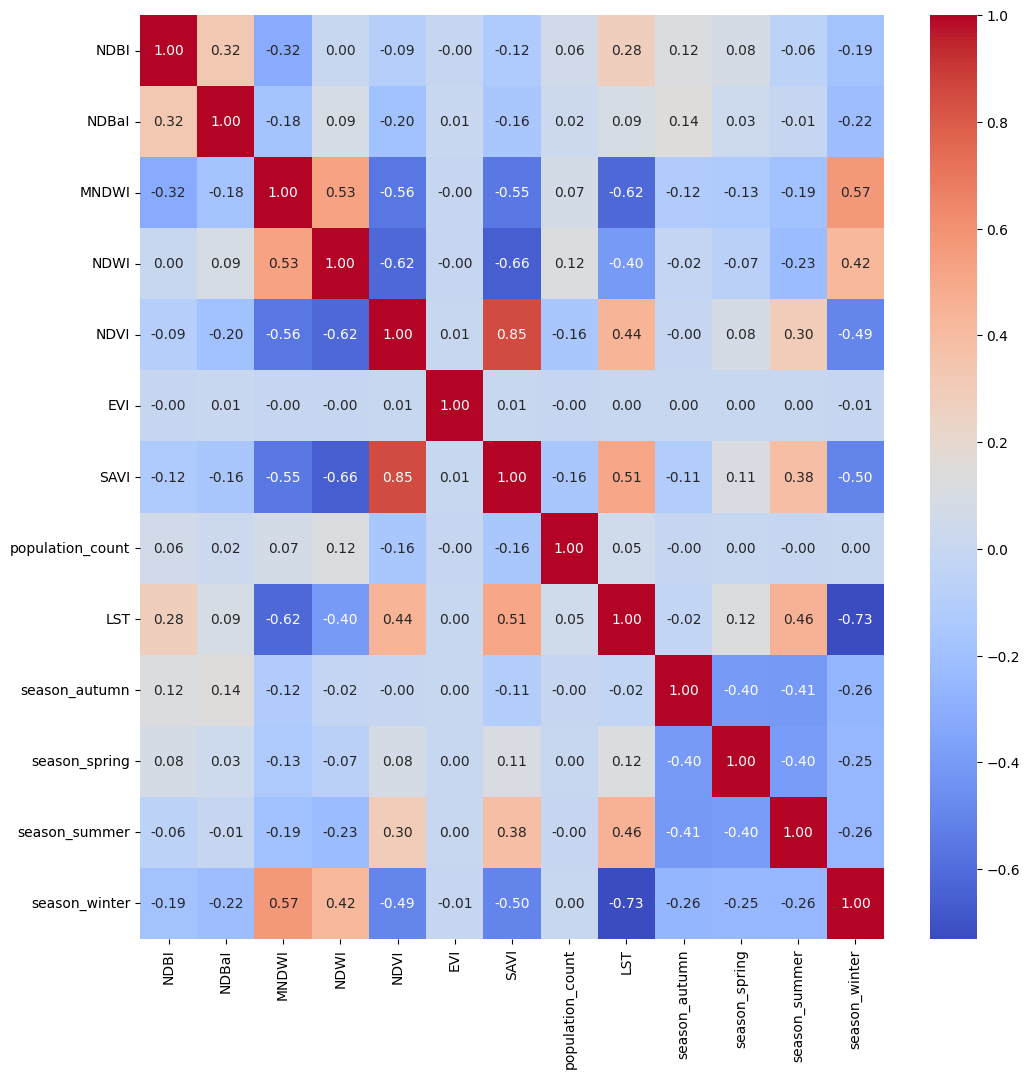

In [28]:
# now let's plot the correlation matrix

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


<Axes: >

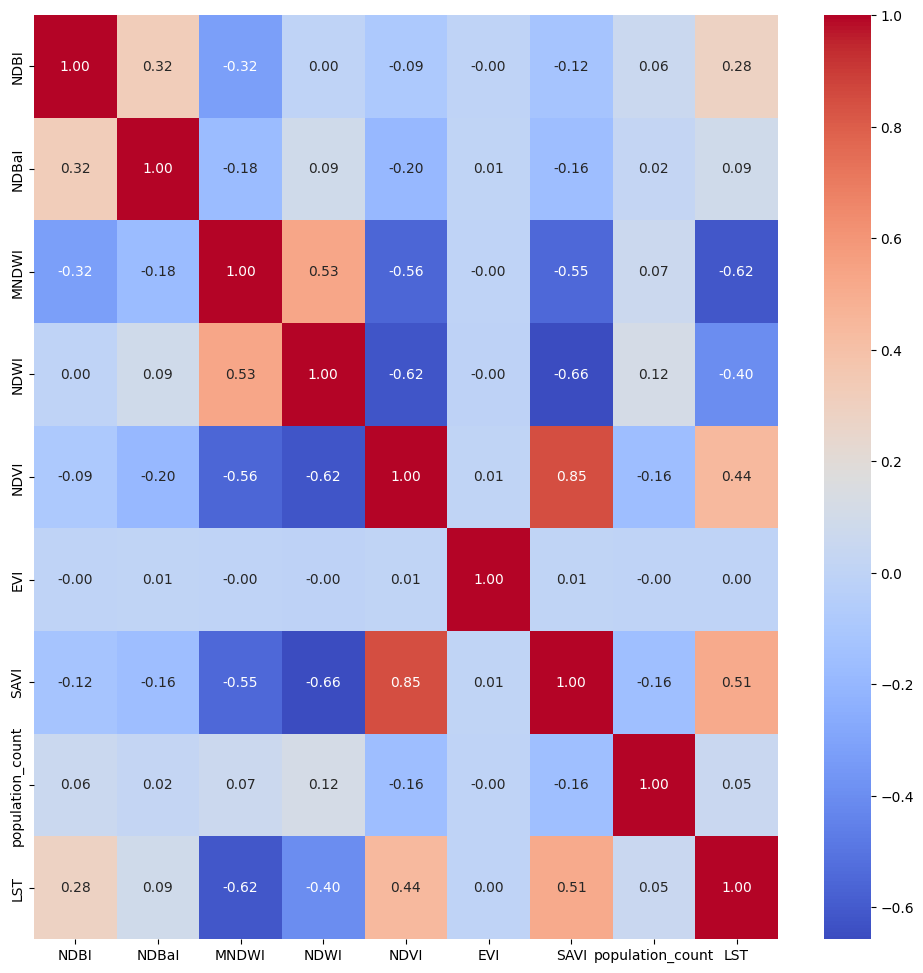

In [32]:
# let's see the correlation when we drop autumn, winter and spring
temp = ds.drop(['season_autumn', 'season_winter', 'season_spring', 'season_summer'], axis=1)
corr = temp.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')


Hypothesis: The mixed land-cover skewed the correlation 

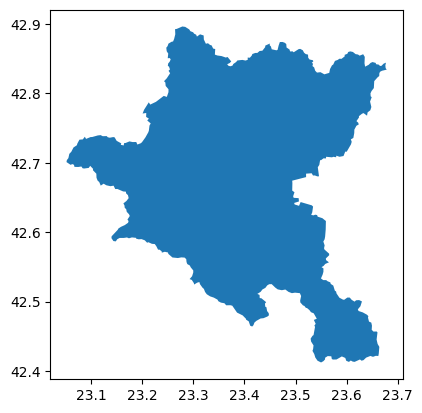

In [17]:
# let's cut each raster according to the sofia boundaries shapefile

import geopandas as gpd
from shapely.geometry import box

sofia = gpd.read_file('shapefiles/sofia-boundaries.json')

sofia.plot()
plt.show()

In [18]:
# now we clip 

def clip_raster(image_path, shapefile_path):
    with rio.open(image_path) as src:
        out_image, out_transform = rio.mask.mask(src, shapefile_path, crop=True, nodata=np.nan)
        out_meta = src.meta.copy()
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})
        return out_image, out_meta

# lets open an image to get its crs
with rio.open('data/images/LC08_184030_20140323.tif') as src:
    print(src.crs)
    sofia = sofia.to_crs(src.crs)

out_image, out_meta = clip_raster('data/images/LC08_184030_20140323.tif', sofia.geometry)


EPSG:32634


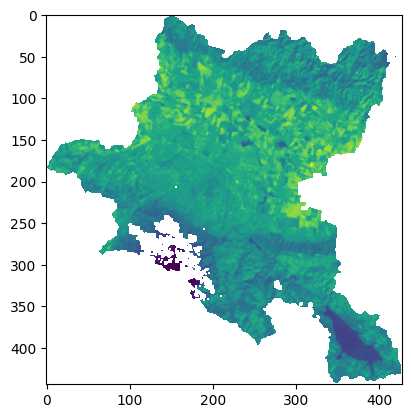

In [19]:
# lets see the clipped image
plt.imshow(out_image[8])

In [20]:
print(np.count_nonzero(~np.isnan(out_image[0])))

90462


## Here we go again

In [21]:
import os
import rasterio as rio

# Ensure the directory exists
output_dir = './data/clipped/'
os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in image_info
for i, row in image_info.iterrows():
    image_path = f'data/images/{row["id"]}.tif'
    # lets set the missing values to np.nan
    out_image, out_meta = clip_raster(image_path, sofia.geometry)
    out_meta.update({'driver': 'GTiff', 'count': out_image.shape[0]})
    
    output_file = f'{output_dir}{row["id"]}.tif'
    with rio.open(output_file, 'w', **out_meta) as dst:
        dst.write(out_image)
    
    print(f'Image {row["id"]} clipped and saved to {output_file}')

Image LE07_184030_19990930 clipped and saved to ./data/clipped/LE07_184030_19990930.tif
Image LE07_184030_20010919 clipped and saved to ./data/clipped/LE07_184030_20010919.tif
Image LT05_184030_19990415 clipped and saved to ./data/clipped/LT05_184030_19990415.tif
Image LE07_184030_20000527 clipped and saved to ./data/clipped/LE07_184030_20000527.tif
Image LE07_184030_20000612 clipped and saved to ./data/clipped/LE07_184030_20000612.tif
Image LE07_184030_20000628 clipped and saved to ./data/clipped/LE07_184030_20000628.tif
Image LT05_184030_20000128 clipped and saved to ./data/clipped/LT05_184030_20000128.tif
Image LT05_184030_20061027 clipped and saved to ./data/clipped/LT05_184030_20061027.tif
Image LT05_184030_20070928 clipped and saved to ./data/clipped/LT05_184030_20070928.tif
Image LT05_184030_20060504 clipped and saved to ./data/clipped/LT05_184030_20060504.tif
Image LT05_184030_20060520 clipped and saved to ./data/clipped/LT05_184030_20060520.tif
Image LT05_184030_20070624 clipp

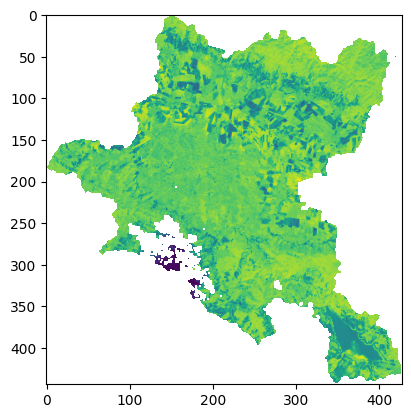

In [22]:
# now lets check out a clipped image

with rio.open('data/clipped/LC08_184030_20140323.tif') as src:
    clipped = src.read()
    plt.imshow(clipped[0])


In [8]:
# aand we now we are going to make a dataset from the clipped images

ds_clipped = pd.DataFrame(columns=['NDBI', 'NDBaI',	'MNDWI',
                                    'NDWI',	'NDVI',	'EVI',	'SAVI',
                                    'population_count', 'LST', 'season'])

data_frames = []

for i, row in image_info.iterrows():
    image_path = f'data/clipped/{row["id"]}.tif'
    season = row['season']
    image = flatten_image(image_path, season)
    data_frames.append(pd.DataFrame(image, columns=ds_clipped.columns))

ds_clipped = pd.concat(data_frames, ignore_index=True)


In [9]:
ds_clipped.to_csv('data/dataset_clipped.csv', index=False)

In [10]:
ds_clipped.head()

,NDBI,NDBaI,MNDWI,NDWI,NDVI,EVI,SAVI,population_count,LST,season
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,autumn
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,autumn
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,autumn
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,autumn
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,autumn


In [ ]:
ds_clipped = pd.read_csv('data/dataset_clipped.csv')

In [11]:
#lets see how many rows we have in the dataset
print(ds_clipped.shape)
ds_clipped.replace('nan', np.nan, inplace=True)

(5308464, 10)


In [13]:
ds_clipped.dropna(inplace=True)
ds_clipped.shape

(2502753, 10)

In [14]:
ds_clipped.to_csv('data/dataset_clipped.csv', index=False)

In [15]:
# let's see how many records we have per season
ds_clipped['season'].value_counts()

season
autumn    741281
summer    726797
spring    689240
winter    345435
Name: count, dtype: int64

In [17]:
ds_nominal = ds_clipped.copy()

# lets encode the season column as a categorical variable
ds_clipped = ds_clipped.join(pd.get_dummies(ds_clipped['season'], prefix='season'))
ds_clipped.drop('season', axis=1, inplace=True) 


In [20]:
# let's see how many records we have per season
ds_clipped.head()

,NDBI,NDBaI,MNDWI,NDWI,NDVI,EVI,SAVI,population_count,LST,season_autumn,season_spring,season_summer,season_winter
576,-0.18916292687916333,-0.9989251758919688,-0.516669058210169,-0.6429896306241057,0.6808775956481666,0.36990236737515125,0.295104823896637,0.0,21.70716746000005,True,False,False,False
577,-0.3365071722027632,-0.9992684773531867,-0.4660649014123179,-0.6937658707505758,0.7664387920592883,0.38947030202882577,0.3002199339795988,0.0,18.70956392000005,True,False,False,False
578,-0.3428183232546515,-0.99920149232767,-0.48352032546165347,-0.7088413678184604,0.7833562393066503,0.4254451618668872,0.33054744072005826,0.0,19.00351364000005,True,False,False,False
579,-0.30740650997496166,-0.9991203304734708,-0.5157541208184188,-0.710511716376509,0.7717819614711033,0.4211379265034383,0.33205136255180207,0.0,19.160742560000017,True,False,False,False
580,-0.28421964873534933,-0.9991237186086032,-0.5013266487825617,-0.6875757687079829,0.7350783263930201,0.38991305880926935,0.30775464861841106,0.0,18.91122710000002,True,False,False,False


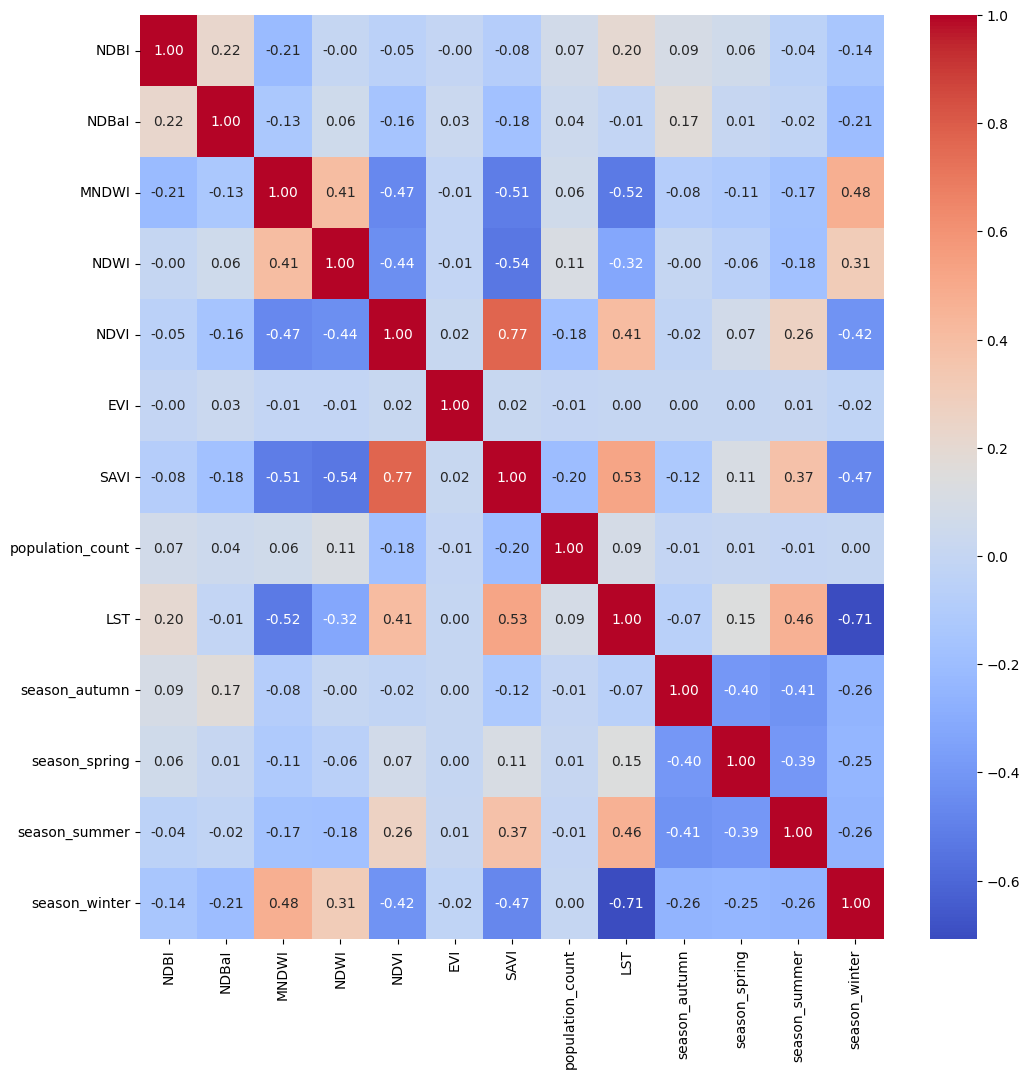

In [21]:
corr = ds_clipped.corr()


plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Hypothesis rejected 